In [173]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import joblib

In [2]:
transactions_annual = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions_annual.csv")
rents_annual = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\rents_annual.csv")

In [3]:
rents_annual['Annual Amount'] = rents_annual['Annual Amount'] / rents_annual['Count']  # Normalize by count
rents_annual['Property Size (sq.m)'] = rents_annual['Property Size (sq.m)'] / rents_annual['Count']  # Normalize by count
rents_annual['Contract Amount'] = rents_annual['Contract Amount'] / rents_annual['Count']  # Normalize by count
rents_annual = rents_annual.drop(columns=['Count'])  # Drop the Count column

# Encode categorical variables
rents_annual = pd.get_dummies(rents_annual, columns=['Version', 'Area', 'Property Type', 'Property Sub Type', 'Usage', 'Is Free Hold?'], drop_first=True)

In [4]:
# Split the rents_annual into features (X) and target (y)
X = rents_annual.drop(columns=['Annual Amount', 'Nearest Metro', 'Nearest Mall', 'Nearest Landmark'])
y = rents_annual['Annual Amount']


In [5]:
# Scale numerical features
scaler = StandardScaler()
X[['Property Size (sq.m)', 'Contract Amount']] = scaler.fit_transform(X[['Property Size (sq.m)', 'Contract Amount']])

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Train a Random Forest Regressor with hyperparameter tuning
model = RandomForestRegressor(random_state=42, verbose=1)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best model
rfr_best_model = grid_search.best_estimator_

# Make predictions
y_pred = rfr_best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importance
feature_importances = rfr_best_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

KeyboardInterrupt: 

In [ ]:
import joblib

# Save the model to a file
joblib.dump(rfr_best_model, 'random_forest_regressor_model.pkl')


In [ ]:
# Train a Decision Tree Regressor with Grid Search
tree_model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (Decision Tree): {mae}")
print(f"R-squared (Decision Tree): {r2}")

In [ ]:
# Train an SVR model with Grid Search
svr_model = SVR()
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose = 2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (SVR): {mae}")
print(f"R-squared (SVR): {r2}")

In [ ]:
import joblib

# Save the SVR model to a file
joblib.dump(best_model, 'svr_model.pkl')

In [ ]:
# Train an MLP Regressor with Grid Search
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='neg_mean_absolute_error', verbose = 2)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MLP): {mae}")
print(f"R-squared (MLP): {r2}")

In [ ]:
joblib.dump(best_model, 'mlp_model.pkl')

# Transactions

In [4]:
transactions_annual["Avg_Price"] = transactions_annual["Amount"] / transactions_annual["Record Count"]
transactions_annual["Avg_Transaction_Size"] = transactions_annual["Transaction Size (sq.m)"] / transactions_annual["Record Count"]
transactions_annual["Avg_Property_Size"] = transactions_annual["Property Size (sq.m)"] / transactions_annual["Record Count"]
transactions_annual["Buyer_Seller_Ratio"] = transactions_annual["No. of Buyer"] / transactions_annual["No. of Seller"]

In [5]:
transactions_annual["Avg_Price_Lag1"] = transactions_annual["Avg_Price"].shift(1)

In [6]:
transactions_annual["Year_Squared"] = transactions_annual["Year"] ** 2

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features: Year, Avg_Transaction_Size, Buyer_Seller_Ratio, Lagged Price
X = transactions_annual[["Year", "Avg_Transaction_Size", "Buyer_Seller_Ratio", "Avg_Price_Lag1"]]
y = transactions_annual["Avg_Price"]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(f"R²: {r2_score(y, y_pred):.2f}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Include polynomial features and economic ratios
X = transactions_annual[["Year", "Avg_Transaction_Size", "Buyer_Seller_Ratio", "Year_Squared"]]
y = transactions_annual["Avg_Price"]

model = RandomForestRegressor(n_estimators=100)
model.fit(X, y)
y_pred = model.predict(X)
print(f"R²: {r2_score(y, y_pred):.2f}")

R²: 0.92


In [10]:
from prophet import Prophet

# Prepare data for Prophet (yearly frequency)
df_prophet = transactions_annual[["Year", "Avg_Price"]].rename(columns={"Year": "ds", "Avg_Price": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")

model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)
future = model.make_future_dataframe(periods=5, freq="YE")
forecast = model.predict(future)

16:11:43 - cmdstanpy - INFO - Chain [1] start processing
16:11:44 - cmdstanpy - INFO - Chain [1] done processing


# transactions individual

In [125]:
transactions= pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions.csv")


C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\1225134425.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions= pd.read_csv("Cleaned Datasets\\Rents & Transactions\\transactions.csv")


In [126]:
transactions['Room(s)'].fillna(0, inplace=True)  # Assume NaN = no rooms
transactions['Parking'].fillna(0, inplace=True)  # Assume NaN = no parking

C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\1616268548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Room(s)'].fillna(0, inplace=True)  # Assume NaN = no rooms
C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\1616268548.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [127]:
transactions['Nearest Metro'].fillna('Unknown', inplace=True)
transactions['Project'].fillna('Unknown', inplace=True)

C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\218053647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['Nearest Metro'].fillna('Unknown', inplace=True)
C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\218053647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [128]:
transactions['Transaction Date'] = pd.to_datetime(transactions['Transaction Date'], errors='coerce')
transactions['Transaction_Year'] = transactions['Transaction Date'].dt.year
transactions['Transaction_Month'] = transactions['Transaction Date'].dt.month

In [129]:
transactions['Price_per_sqm'] = transactions['Amount'] / transactions['Property Size (sq.m)']

In [130]:
transactions = transactions.drop(columns=['Transaction Number', 'Property ID', 'Transaction Date'])

In [131]:
columns_to_have = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ]
columns_to_drop = ['Property Type','Usage','Room(s)','Parking','Project', 'Transaction Type','Is Free Hold?','Transaction sub type','Registration type','Property Sub Type']
transactions = transactions.drop(columns_to_drop, axis = 1)

# location related columns

In [132]:
# columns_to_have = ['Property Type','Is Free Hold?','Registration type']
# columns_to_drop = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall','Transaction Type','Transaction sub type','Usage','Project','Property Sub Type' ]
# transactions = transactions.drop(columns_to_drop, axis = 1)



In [133]:
transactions = pd.get_dummies(transactions, columns=columns_to_have)

In [134]:
columns_to_keep = [
    'Area_Jabal Ali', 'Area_DUBAI WATER FRONT',
    'Nearest Metro_Unknown', 'Nearest Metro_Palm Jumeirah',
    'Area_PALM DEIRA', 'Area_Saih Aldahal', 'Area_Al Warsan Second',
    'Area_PALM JUMEIRAH', 'Transaction Size (sq.m)', 'Area_Al Barsha First','Amount', 'Transaction_Year' 
]

transactions = transactions[columns_to_keep]

In [135]:
# List of columns to keep based on feature importance
# columns_to_keep = [
#     'Is Free Hold?_Free Hold',
#     'Parking',
#     'Property Type_Building',
#     'Price_per_sqm',
#     'Transaction_Year',
#     'Transaction_Month',
#     'Transaction Size (sq.m)',
#     'Property Size (sq.m)',
#     'Property Type_Land',
#     'Amount',
#     'Transaction_Year'
# ]

# Filter the dataframe to keep only the important columns
# transactions_filtered = transactions[columns_to_keep]


In [136]:
# Sort by date and split
transactions = transactions.sort_values('Transaction_Year')
train = transactions[transactions['Transaction_Year'] < 2022]
test = transactions[transactions['Transaction_Year'] >= 2022]

X_train, y_train = train.drop(columns=['Amount']), train['Amount']
X_test, y_test = test.drop(columns=['Amount']), test['Amount']

In [141]:
# Define the model
transaction_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [500, 1000, 1500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition
}

# Define the scoring function (e.g., negative mean squared error for regression)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=transaction_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1  # Print progress
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", -grid_search.best_score_)  # Negative because we used negative MSE

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'gamma': 0, 'learning_rate': 0.05, 'n_estimators': 500}
Best score found:  532591562955.83154


In [142]:
# Use the best model to make predictions
transactions_best_model = grid_search.best_estimator_
predictions = transactions_best_model.predict(X_test)

In [143]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 546795.5107138631
R-squared (R²): 0.42772196201350443


In [175]:
joblib.dump(transactions_best_model, 'transactions_xgb_model.pkl')

['transactions_xgb_model.pkl']

Text(0.5, 0, 'Feature Importance')

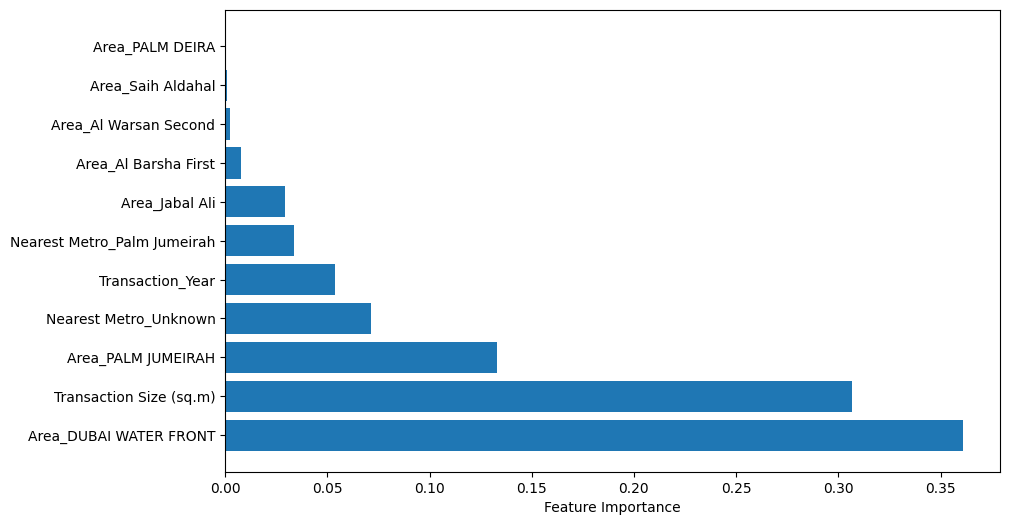

In [ ]:
# Get feature importance
feature_importance = transaction_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')

# Rents Individual

In [158]:
rents = pd.read_csv("Cleaned Datasets\\Rents & Transactions\\rents.csv")

In [159]:
rents['Registration Date'] = pd.to_datetime(rents['Registration Date'], errors='coerce')
rents['Transaction Year'] = rents['Registration Date'].dt.year

C:\Users\Cody\AppData\Local\Temp\ipykernel_4056\4074777184.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rents['Registration Date'] = pd.to_datetime(rents['Registration Date'], errors='coerce')


In [160]:
# rents['Price_per_sqm'] = rents['Annual Amount'] / rents['Property Size (sq.m)']

In [161]:
rents.drop(columns=['Ejari Contract Number', 'Registration Date', 'Start Date', 'End Date', 'Property ID','Contract Amount','Duration (days)', 'No of Units'], inplace=True)

In [162]:
columns_to_have = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ]
columns_to_drop = ['Property Type','Usage','Is Free Hold?','Property Sub Type', 'Property Size (sq.m)']
rents = rents.drop(columns_to_drop, axis = 1)


In [163]:
# columns_to_drop = ['Area', 'Nearest Metro','Nearest Landmark', 'Nearest Mall' ,'Property Sub Type', 'Property Size (sq.m)']
# columns_to_have = ['Property Type','Usage','Is Free Hold?']
# rents = rents.drop(columns_to_drop, axis = 1)


In [164]:
rents = pd.get_dummies(rents, columns=columns_to_have)

In [165]:
columns_to_keep = [
    'Area_Al Thanayah Fourth', 'Area_Wadi Al Safa 6', 'Area_Al Warsan First', 'Area_Al Mararr',
    'Area_Jabal Ali Industrial First', 'Area_Al Saffa First', 'Area_Jumeirah Third', 'Area_Al Qusais First',
    'Area_Muhaisanah Second', 'Nearest Metro_Buj Khalifa Dubai Mall Metro Station', 'Area_Wadi Al Safa 7',
    'Area_Al Thanyah First', 'Area_Jumeirah First', 'Nearest Metro_Harbour Tower', 'Area_Al Barsha First',
    'Area_Al Thanyah Third', 'Area_Mirdif', 'Area_Al Thanyah Fifth', 'Nearest Landmark_Burj Al Arab',
    'Area_Al Suq Al Kabeer', 'Transaction Year', 'Annual Amount'
]

rents = rents[columns_to_keep]


In [166]:
# columns_to_keep = [
#     'Property Type_Villa', 'Property Type_Virtual Unit', 'Usage_Residential', 'Is Free Hold?_Free Hold',
#     'Property Type_Land', 'Usage_Industrial', 'Transaction Year', 'Annual Amount'
# ]

# rents = rents[columns_to_keep]


In [167]:
# Sort by date and split
rents = rents.sort_values('Transaction Year')
train = rents[rents['Transaction Year'] < 2022]
test = rents[rents['Transaction Year'] >= 2022]

X_train, y_train = train.drop(columns=['Annual Amount']), train['Annual Amount']
X_test, y_test = test.drop(columns=['Annual Amount']), test['Annual Amount']

In [168]:
rents_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid to search
param_grid = {
    'n_estimators': [1500],  # Number of trees
    'learning_rate': [0.01],  # Learning rate
    'gamma': [0]  # Minimum loss reduction required to make a further partition
}

# Define the scoring function (e.g., negative mean squared error for regression)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rents_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1  # Print progress
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found (negative MSE): ", grid_search.best_score_)

# Best parameters found:  {'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 1500}
# Best score found (negative MSE):  -2353529068.955632

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 1500}
Best score found (negative MSE):  -2372667744.018547


In [169]:
# Use the best model to make predictions
rents_best_model = grid_search.best_estimator_
predictions = rents_best_model.predict(X_test)

In [170]:
# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 33250.33814097817
R-squared (R²): 0.14903553620885668


In [174]:
joblib.dump(rents_best_model, 'rents_xgb_model.pkl')

['rents_xgb_model.pkl']

Text(0.5, 0, 'Feature Importance')

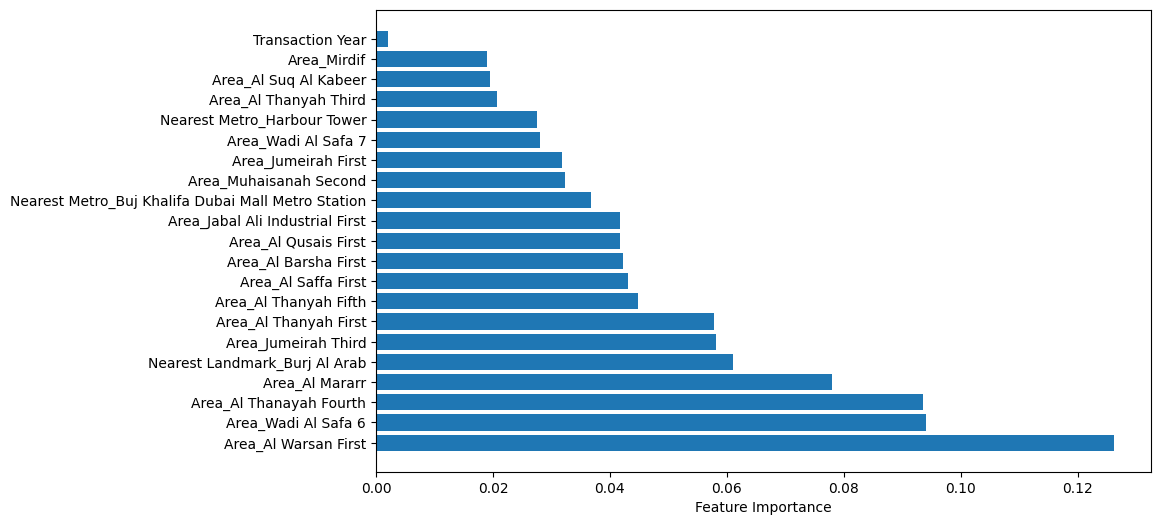

In [171]:
# Get feature importance
feature_importance = rents_best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')